<a href="https://colab.research.google.com/github/k-parikh9/Original-Work/blob/main/Spam_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machine
Average accuracy: 0.9336590662323558
Average precision: 0.926356294301514
Average recall: 0.9007609778621604

Gaussian Naive Bayes
Average accuracy: 0.8165038002171554
Average precision: 0.6912401346316646
Average recall: 0.9498937507992782

Random Forest Classifier
Average accuracy: 0.9496199782844734
Average precision: 0.9523087649055688
Average recall: 0.9199099611955193


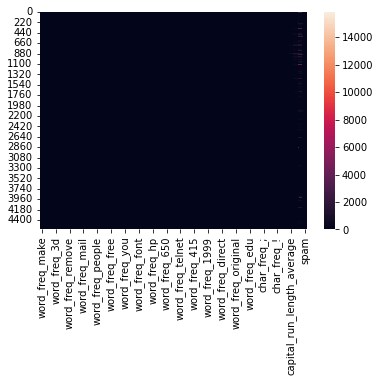

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


# Loading data from csv file
email_data = pd.read_csv('Spam.csv')

# Renaming columns
email_data.columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]


# Key stats of all columns pre-scaling
email_data.describe()

# Heatmap
sns.heatmap(email_data)

# Scaling data
scalar = StandardScaler()
X = scalar.fit_transform(email_data.iloc[:, :-1])

# Method to run supplied model for n times
def runModel(mod, num = 10):

  num_tests = num
  accuracy_values = []
  precision_values = []
  recall_values = []
  for i in range(num_tests):
    # Splitting into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, email_data.iloc[:, -1], test_size=0.2, random_state=None)

    # Instantiating, training, and testing SVC model
    model = mod
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating and storing accuracy measures
    accuracy_values.append(accuracy_score(y_test, y_pred))
    precision_values.append(precision_score(y_test, y_pred))
    recall_values.append(recall_score(y_test, y_pred))

  avg_accuracy = sum(accuracy_values) / len(accuracy_values)
  avg_precision = sum(precision_values) / len(precision_values)
  avg_recall = sum(recall_values) / len(recall_values)
  print(f'Average accuracy: {avg_accuracy}')
  print(f'Average precision: {avg_precision}')
  print(f'Average recall: {avg_recall}')

# Running models
print('Support Vector Machine')
runModel(SVC())
print('\nGaussian Naive Bayes')
runModel(GaussianNB())
print('\nRandom Forest Classifier')
runModel(RandomForestClassifier())




